In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files =[file for file in os.listdir(r"C:\Users\LENOVO\Desktop\Data analytics\Sales\Sales_Data")]    # r : it converts normal string to raw string
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path = r"C:\Users\LENOVO\Desktop\Data analytics\Sales\Sales_Data"

#blank dataframe
Data = pd.DataFrame()

for file in files[1:]:
    current_df = pd.read_csv(path+"/"+file)
    Data = pd.concat([Data, current_df])
    
Data.shape

(186850, 6)

### Data Cleaning and Formatting

In [4]:
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
Data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
Data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
#all_data = all_data.dropna(how='all')
Data.dropna(inplace = True)

In [8]:
Data.shape

(186305, 6)

In [9]:
def GetMonth(x):
    return x.split('/')[0]

In [10]:
Data['Month']=Data['Order Date'].apply(GetMonth)

In [11]:
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [12]:
Data['Month'].dtype

dtype('O')

In [13]:
# Data['Month'].astype(int)             # this will give error : invalid literal for int() with base 10: 'Order Date' because one weird entry

In [14]:
# to find what;s wrong
Data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [15]:
filter = Data['Month'] == 'Order Date'
Data = Data[~filter]                        #negation of filter

In [16]:
Data['Month']=Data['Month'].astype(int)

In [17]:
Data['Month'].dtype

dtype('int32')

In [18]:
Data['Price Each']=Data['Price Each'].astype(float)
Data['Quantity Ordered']=Data['Quantity Ordered'].astype(int)

In [19]:
Data['sales']=Data['Quantity Ordered']*Data['Price Each']
Data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [20]:
monthwise_sales = np.round(Data.groupby('Month')['sales'].sum(),2)
monthwise_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

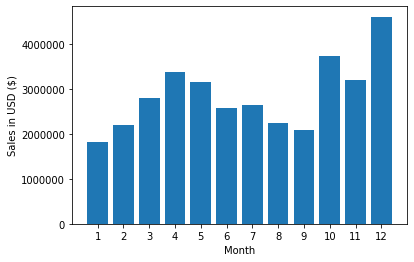

In [21]:
months=range(1,13)
plt.bar(months,monthwise_sales)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

### Which city has maximum number of orders

In [22]:
'669 Spruce St, Los Angeles, CA 90001'.split(',')[1]

' Los Angeles'

In [23]:
def getcity(x):
    return x.split(',')[1]

In [24]:
Data['city']=Data['Purchase Address'].apply(getcity)
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [25]:
Data.groupby('city').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
city,,,,,,,,
Atlanta,14881,14881,14881,14881,14881,14881,14881,14881
Austin,9905,9905,9905,9905,9905,9905,9905,9905
Boston,19934,19934,19934,19934,19934,19934,19934,19934
Dallas,14820,14820,14820,14820,14820,14820,14820,14820
Los Angeles,29605,29605,29605,29605,29605,29605,29605,29605
New York City,24876,24876,24876,24876,24876,24876,24876,24876
Portland,12465,12465,12465,12465,12465,12465,12465,12465
San Francisco,44732,44732,44732,44732,44732,44732,44732,44732
Seattle,14732,14732,14732,14732,14732,14732,14732,14732


In [26]:
citywise_sales = Data.groupby('city')['city'].count()
citywise_sales

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

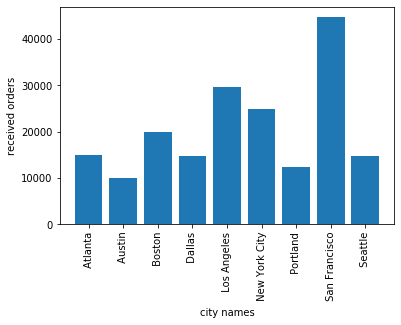

In [27]:
plt.bar(citywise_sales.index, citywise_sales)
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

In [28]:
citywise_sales.index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='city')

### Graph to show max. trafic time

In [29]:
Data['Hour'] = pd.to_datetime(Data['Order Date']).dt.hour
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


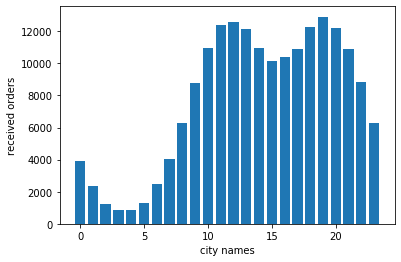

In [30]:
hours=range(0,24)
tsales = Data.groupby('Hour')['sales'].count()
plt.bar(hours, tsales)
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

### Better Way 

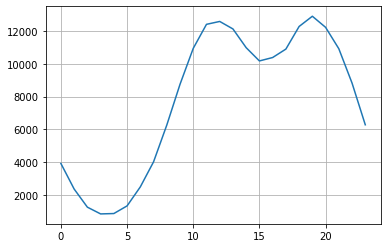

In [44]:
# c

keys=[]
hour=[]
f = []
for key,hour_df in Data.groupby('Hour'):              #yh
    keys.append(key)
    hour.append(len(hour_df))
    f.append(hour_df)


plt.grid()
plt.plot(keys,hour)
plt.show()

### Now we can easily see the best time to advertise to maximise product purchase^ 

### What product sold the most? 

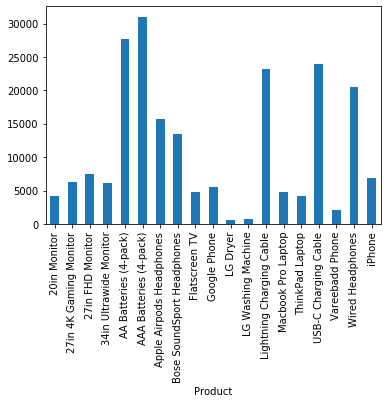

In [32]:
Data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [33]:
Data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [34]:
products=Data.groupby('Product')['Quantity Ordered'].sum().index
quantity=Data.groupby('Product')['Quantity Ordered'].sum()
prices=Data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 4320x2448 with 0 Axes>

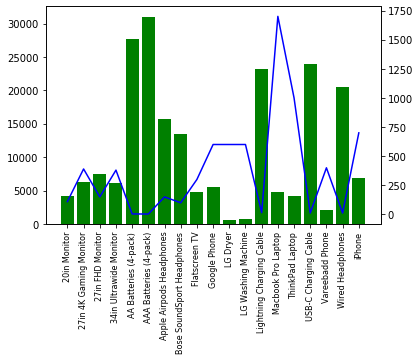

In [35]:
plt.figure(figsize=(60,34))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

In [48]:
print(hour)

[3910, 2350, 1243, 831, 854, 1321, 2482, 4011, 6256, 8748, 10944, 12411, 12587, 12129, 10984, 10175, 10384, 10899, 12280, 12905, 12228, 10921, 8822, 6275]


In [46]:
print(f[:1])

[      Order ID                 Product  Quantity Ordered  Price Each  \
20      176575  AAA Batteries (4-pack)                 1        2.99   
25      176580    USB-C Charging Cable                 1       11.95   
57      176610  AAA Batteries (4-pack)                 1        2.99   
114     176667  27in 4K Gaming Monitor                 1      389.99   
124     176676                LG Dryer                 1      600.00   
...        ...                     ...               ...         ...   
11610   259289         ThinkPad Laptop                 1      999.99   
11639   259314        Wired Headphones                 1       11.99   
11640   259314  AAA Batteries (4-pack)                 2        2.99   
11663   259336  AAA Batteries (4-pack)                 3        2.99   
11685   259357    USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month   sales  \
20     04/27/19 00:30    433 Hill St, New York City, N